In [1]:


import numpy as np
import pandas as p

import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

C:\Users\Ashish Sugunan\AppData\Local\Temp\ipykernel_8236\1086015875.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as p


### Get the images from the dataset and preprocess

In [2]:
def get_and_preprocess(path):
    normal = glob.glob(f'{path}/NORMAL/*')
    pneumonia = glob.glob(f'{path}/PNEUMONIA/*')
    X = []
    y = []
    for i in normal:
        image = cv2.imread(i,0)
        image = cv2.resize(image, (128, 128))
        image = image/255
        image = np.expand_dims(image, axis=-1)  # Add a channel dimension
        X.append(image)
        y.append(0)  #0 for normal
    for i in pneumonia:
        image = cv2.imread(i,0)
        image = cv2.resize(image, (128,128))
        image = image/255
        image = np.expand_dims(image, axis=-1)  # Add a channel dimension
        X.append(image)
        y.append(1)  #1 for pneumonia
    
    return X,y

In [3]:
X_train, y_train = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\train')
X_val, y_val = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\val')
X_test, y_test = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\test')


In [4]:
len(X_train)

5216

In [5]:
print(y_train.count(0))
print(y_train.count(1))

1341
3875


### Visualization of images

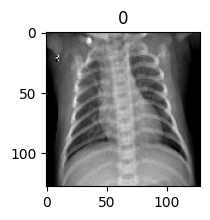

In [6]:
plt.figure(figsize=(2, 2))

# Check the length of X_train and y_train
data_length = len(X_train)

# Make sure the index is within the valid range
index_to_display = 22
if index_to_display < data_length:
    plt.imshow(X_train[index_to_display], cmap='gray')
    plt.title(str(y_train[index_to_display]))
    plt.show()
else:
    print(f"Invalid index: {index_to_display}. Dataset length is {data_length}.")



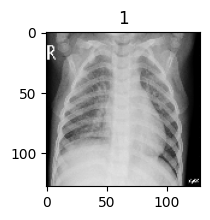

In [8]:
plt.figure(figsize=(2, 2))

# Check the length of X_train and y_train
data_length = len(X_train)

# Specify the index to display
index_to_display = 1564

# Make sure the index is within the valid range
if 0 <= index_to_display < data_length:
    plt.imshow(X_train[index_to_display], cmap='gray')
    plt.title(str(y_train[index_to_display]))
    plt.show()
else:
    print(f"Invalid index: {index_to_display}. Dataset length is {data_length}.")


### Model Building

In [9]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [10]:
print("Length of X_train:", len(X_train))

if len(X_train) > 0:
    print("Shape of the first element in X_train:", X_train[0].shape)
else:
    print("X_train is empty.")


Length of X_train: 5216
Shape of the first element in X_train: (128, 128, 1)


In [11]:
y_train = to_categorical(y_train,num_classes=2)
y_val = to_categorical(y_val,num_classes=2)
y_test = to_categorical(y_test,num_classes=2)

In [12]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [13]:
model = Sequential()
model.add(Conv2D(128,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(8,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(8,(3,3),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))

model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2,activation='softmax'))

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.metrics.Precision(name='precision')])

In [15]:
# Check the shapes of your data before fitting
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check if data is non-empty
if X_train.size == 0 or y_train.size == 0:
    print("Error: Input data is empty.")
else:
    # Train the model
    model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Shape of X_train: (5216, 128, 128, 1)
Shape of y_train: (5216, 2)
Epoch 1/10


163/163 [==============================] - 58s 341ms/step - loss: 0.5718 - accuracy: 0.7406 - precision: 0.7406 - val_loss: 0.7275 - val_accuracy: 0.5000 - val_precision: 0.5000
Epoch 2/10
163/163 [==============================] - 57s 348ms/step - loss: 0.3373 - accuracy: 0.8484 - precision: 0.8484 - val_loss: 0.6230 - val_accuracy: 0.6250 - val_precision: 0.6250
Epoch 3/10
163/163 [==============================] - 59s 365ms/step - loss: 0.1705 - accuracy: 0.9404 - precision: 0.9404 - val_loss: 0.9329 - val_accuracy: 0.5625 - val_precision: 0.5625
Epoch 4/10
163/163 [==============================] - 54s 330ms/step - loss: 0.1416 - accuracy: 0.9484 - precision: 0.9484 - val_loss: 0.4562 - val_accuracy: 0.6875 - val_precision: 0.6875
Epoch 5/10
163/163 [==============================] - 56s 342ms/step - loss: 0.1116 - accuracy: 0.9548 - precision: 0.9548 - val_loss: 0.1575 - val_accuracy: 0.9375 - val_preci

In [16]:
# Assuming you have compiled your model before training
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print shapes and sizes for debugging
print("Shape of X_test:", X_test.shape)
print("Size of X_test:", X_test.size)
print("Shape of y_test:", y_test.shape)
print("Size of y_test:", y_test.size)

# Check if data is non-empty
if X_test.size > 0 and y_test.size > 0:
    # Evaluate the model on the test set
    evaluation_result = model.evaluate(X_test, y_test)

    # Print the evaluation result
    print("Test Loss:", evaluation_result[0])
    print("Test Accuracy:", evaluation_result[1])
else:
    print("Error: Input data is empty.")



Shape of X_test: (624, 128, 128, 1)
Size of X_test: 10223616
Shape of y_test: (624, 2)
Size of y_test: 1248
20/20 [==============================] - 2s 84ms/step - loss: 1.0010 - accuracy: 0.7500 - precision: 0.7500
Test Loss: 1.0009987354278564
Test Accuracy: 0.75


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
preds = model.predict(X_test)
y_pred = np.argmax(preds,axis=1)
y_test = np.argmax(y_test,axis=1)




20/20 [==============================] - 2s 84ms/step


In [19]:

preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


20/20 [==============================] - 2s 82ms/step
[[ 84 150]
 [  6 384]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.36      0.52       234
           1       0.72      0.98      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624



In [21]:
model.save('pneumonia.h5')

c:\Users\Ashish Sugunan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
def predict_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (128, 128))
    img = img / 255
    img = np.expand_dims(img, axis=-1)
    img = img.reshape((1,) + img.shape)
    return img

image_path = 'C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\test\\PNEUMONIA\\person100_bacteria_482.jpeg'
image = predict_image(image_path)

pred = np.argmax(model.predict(image), axis=1)
if pred == 0:
    print("NORMAL")
else:
    print("PNEUMONIA")

NameError: name 'cv2' is not defined

In [1]:
def predict_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (128, 128))
    img = img / 255
    img = np.expand_dims(img, axis=-1)
    img = img.reshape((1,) + img.shape)
    return img

image_path = 'C:\Users\Ashish Sugunan\OneDrive\Desktop\mini-project\\xray buttockss.jpeg'
image = predict_image(image_path)

pred = np.argmax(model.predict(image), axis=1)
if pred == 0:
    print("NORMAL")
else:
    print("PNEUMONIA")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2489943611.py, line 9)

In [23]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
# Calculate and print other evaluation metrics
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Alternatively, you can use scikit-learn's classification_report for a comprehensive report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 80 154]
 [  3 387]]

Accuracy: 0.7483974358974359
Precision: 0.7153419593345656
Recall: 0.9923076923076923
F1 Score: 0.8313641245972072

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.34      0.50       234
           1       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.67       624
weighted avg       0.81      0.75      0.71       624

